# TODO:

1. Plot PCA and UMAP for original data (predefiend seed to show results) (observe different seeds to make conclusions)
2. Labels of best kmeans and optics (predefined seed to show results)
3. Reduce dimensionality and apply best kmeans and optics configurations for the dataset.





10 different seeds to compute k-means and optics and choose the seed with the maximum score

## Imports

In [1]:
import os
os.chdir("..")

In [27]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [3]:
from preprocessing import DataLoader, DataProcessor
from clustering.kmeans import kmeans, global_kmeans

In [4]:
data_loader = DataLoader()
data_processor = DataProcessor()

datasets_info = {
        'satimage': data_loader.load_arff_data('satimage'),
        'splice': data_loader.load_arff_data('splice'),
        'vowel': data_loader.load_arff_data('vowel')
    }

preprocessed_datasets = {}
for dataset_name, (df, labels) in datasets_info.items():
    preprocessed_df = data_processor.preprocess_dataset(df)
    
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    preprocessed_datasets[dataset_name] = {
        'df': preprocessed_df,
        'labels': encoded_labels
    }

# 1. Original data

### PCA

### UMAP

In [11]:
def plot_umap(df, labels, n_neighbors_values=[15, 50, 100]):

    fig = plt.figure(figsize=(15, 5))  # Adjust figure size for 3 columns

    for i, n_neighbors in enumerate(n_neighbors_values):
        # Compute UMAP embedding
        um = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.1, n_components=3, random_state=42)
        embedding = um.fit_transform(df)

        # Create a 3D subplot
        ax = fig.add_subplot(1, 3, i + 1, projection='3d')
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=labels, cmap='tab10', s=10)

        # Add labels and title
        ax.set_title(f'UMAP with n_neighbors={n_neighbors}')
        ax.set_xlabel('UMAP Dim 1')
        ax.set_ylabel('UMAP Dim 2')
        ax.set_zlabel('UMAP Dim 3')

    # Add color bar to the figure
    # fig.colorbar(scatter, ax=fig.get_axes(), orientation='vertical', label='Classes')

    plt.suptitle(f'3D UMAP Projections of {dataset_name.upper()}')
    plt.tight_layout()
    plt.show()


In [70]:
def plot_umap_single(df, labels, n_neighbors=15):
    fig = plt.figure(figsize=(15, 5))  # Adjust figure size for 3 columns

    um = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.1, n_components=3, random_state=42)
    embedding = um.fit_transform(df)

    # Create a 3D subplot
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=labels, cmap='tab10', s=10)

    # Add labels and title
    # ax.set_title(f'UMAP with n_neighbors={n_neighbors}')
    ax.set_xlabel('UMAP Dim 1')
    ax.set_ylabel('UMAP Dim 2')
    ax.set_zlabel('UMAP Dim 3')

    # Add color bar to the figure
    # fig.colorbar(scatter, ax=fig.get_axes(), orientation='vertical', label='Classes')

    # plt.suptitle(f'3D UMAP Projections of {dataset_name.upper()}')
    # plt.tight_layout()
    plt.show()

In [78]:
def plot_umap_A(df, labels):
    # Create a color palette
    palette = sns.color_palette('husl', len(np.unique(labels)))

    # Plot the UMAP embedding
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='UMAP1', y='UMAP2', hue='Label', data=df, palette=palette, s=10, edgecolor='k', alpha=0.8
    )

    # Add titles and labels
    plt.title('UMAP Projection', fontsize=16)
    plt.xlabel('UMAP1', fontsize=14)
    plt.ylabel('UMAP2', fontsize=14)
    plt.legend(title='Classes', labels=labels, loc='best', fontsize=12, title_fontsize=14)
    plt.grid(True, alpha=0.4)
    plt.tight_layout()

    # Show the plot
    plt.show()

/Users/julia/anaconda3/envs/iml/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


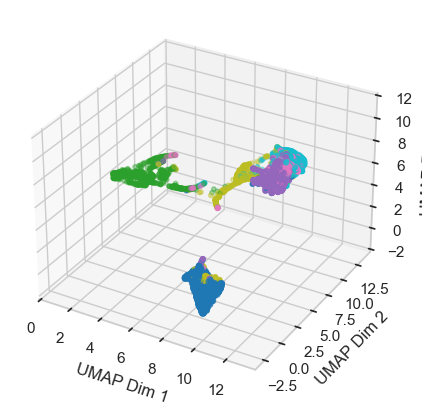

/Users/julia/anaconda3/envs/iml/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KeyboardInterrupt: 

<Figure size 1500x500 with 0 Axes>

In [75]:
for dataset_name, dataset_content in preprocessed_datasets.items():
    df = np.array(dataset_content['df'])
    labels = np.array(dataset_content['labels']).astype(int)

    plot_umap_single(df, labels)
    break

# Clustering results

1. Read best configs
2. Apply best configs to obtain clustering labels
3. Plot results


Kmeans

In [ ]:
# Work3 best configurations
best_configs = pd.read_csv("w3_results/kmeans_configs.csv")
best_configs

,dataset,metric,k,distance,metric_score
0,satimage,Adjusted Rand Index,6,cosine,0.57980
1,satimage,Davies-Bouldin Index,3,manhattan,0.81180
2,satimage,Silhouette Score,3,euclidean,0.43730
3,satimage,Purity Score,14,cosine,0.83210
4,splice,Adjusted Rand Index,4,euclidean,0.43050
5,splice,Davies-Bouldin Index,15,manhattan,6.52080
6,splice,Silhouette Score,2,manhattan,0.01727
7,splice,Purity Score,10,cosine,0.90050
8,vowel,Adjusted Rand Index,6,euclidean,0.17080
9,vowel,Davies-Bouldin Index,15,manhattan,1.64680


In [ ]:
dataset_clusters = {}

for dataset_name, metric, best_k, best_dist, _ in np.array(best_configs):
    X = preprocessed_datasets[dataset_name]['df']

    # Global KMeans
    if dataset_name == 'satimage':
            km = global_kmeans.fast_global_k_means(k=best_k, distance=best_dist)
            y_pred = km.fit_predict(X)
        
    # KMeans
    else:
        km = kmeans.KMeans(k=best_k, distance=best_dist)
        y_pred = km.fit_predict(X)

    if dataset_name not in dataset_clusters:
        dataset_clusters[dataset_name] = {}

    dataset_clusters[dataset_name][metric] = {'data': X, 'labels': y_pred}    

Mostrar resultats per cada dataset_cluster results (4 plots, 1 per metrica)

optics

In [9]:
best_configs_optics = pd.read_csv("w3_results/optics_configs.csv")
best_configs_optics

,dataset,metric,metric_type,algorithm,min_samples,n_clusters,metric_score
0,satimage,ARI,euclidean,brute*,2,648,0.02208
1,satimage,DBI,euclidean,brute*,8,4,0.32574
2,satimage,Silhouette,euclidean,brute*,8,4,0.78082
3,satimage,Purity,l1,brute*,2,851,0.50645
4,splice,ARI,l1,brute*,2,280,0.18572
5,splice,DBI,euclidean,brute*,4,33,0.96019
6,splice,Silhouette,euclidean,brute*,4,33,0.44728
7,splice,Purity,l1,brute*,2,280,0.72688
8,vowel,ARI,euclidean,brute*,4,154,0.08904
9,vowel,DBI,euclidean,brute*,2,288,0.61628


In [ ]:
dataset_clusters = {}

for dataset_name, metric, metric_type, min_samples, n_clusters, _ in np.array(best_configs):
    X = preprocessed_datasets[dataset_name]['df']

    # Apply optics
    
    dataset_clusters[dataset_name][metric] = {'data': X, 'labels': y_pred}    

### UMAP

# Reduction + clustering

1. Reduir dataset
2. Aplicar millor configuració en el conjunt de dades amb només 3 axis.